# Credit Card Fraud Detection using Random Forest Classifier

Import libraries

In [5]:
pip install -r ./requirements.txt | grep -v 'Requirement already satisfied';

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 322.8 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import imblearn
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [7]:
from imblearn.over_sampling import RandomOverSampler

Read the data

In [8]:
df = pd.read_csv("/Users/nathaly/Portfolio/PortfolioDataScientist/Project5/creditcard.csv")

The data was obtained from Kaggle.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

This dataset presents transactions that occurred in two days. The column Class take the values 0 an 1, 1 if there is a fraud in the transaction.

## Explore

We are going to explore the dataset. First we are going to see the head of it.

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.shape

(284807, 31)

In [11]:
df.isnull().sum().sum()

0

We can see that there is not null values.

Now we are going to plot the Class Balance.

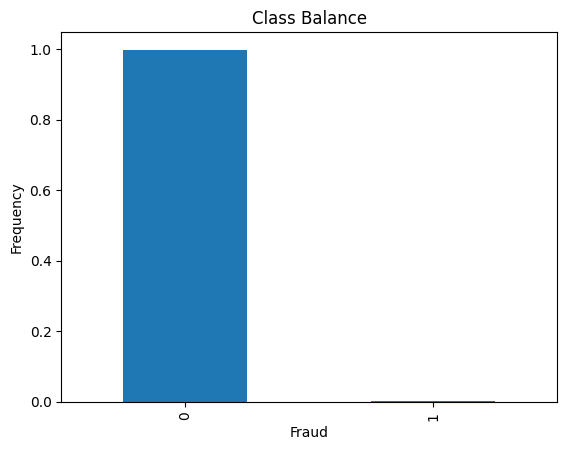

In [12]:
# Plot class balance
df["Class"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Fraud",
    ylabel="Frequency",
    title="Class Balance"
);

We have an imbalanced dataset. Our majority class is far bigger than our minority class.

## Split

We are going to split the data frame in X and y and then we are going to use train test plit to obtain X train, X test, y train and y test.

In [13]:
target = "Class"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (284807, 30)
y shape: (284807,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (227845, 30)
y_train shape: (227845,)
X_test shape: (56962, 30)
y_test shape: (56962,)


## Resample

We see that the data set es imbalanced. 

In [15]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

We are going to cretae a new feature matrix X_train_over and target vector y_train_over by performing random over-sampling on our training data. We choose over sampling because we saw in the previous project that under sampling was not good.

In [16]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(454902, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
1,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
2,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
3,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
4,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76


In [17]:
y_train_over.value_counts(normalize=True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

## Model

Baseline

We calculate the baseline accuracy score for our model.

In [18]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9983


## Iterate

We are going to create a model named clf, it is going to contain Random Forest Classifier.

In [19]:
clf = make_pipeline(RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


We are going to perform cross-validation with the classifier, using the over-sampled training data. 

We are going to have five folds, we set cv to 5. We want to speed up training, to set n_jobs to -1.

In [20]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99994504 0.99997802 0.99996703 0.99997802 0.99993405]


Now we create a dictionary with the range of hyperparameters that we are going to evaluate for our classifier.

In [21]:
params = {
    "randomforestclassifier__max_depth": range(10,50,10),
    "randomforestclassifier__n_estimators": range(25,100,25)
}
params

{'randomforestclassifier__max_depth': range(10, 50, 10),
 'randomforestclassifier__n_estimators': range(25, 100, 25)}

We create a GridSearchCV to which we called model. This is going to include our classifier and hyperparameter grid. 

In [22]:
model = GridSearchCV(
    clf,
    param_grid = params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

 We fit model to the over-sampled training data.

In [23]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

Now we extract the cross-validation results from the model

In [24]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,92.171572,2.523215,0.355224,0.035024,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.996944,0.996944,0.998505,0.997032,0.995955,0.997076,0.000817,11
1,159.321116,4.978831,0.580892,0.048078,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.996999,0.997065,0.997285,0.997120,0.997285,0.997151,0.000116,10
2,228.709802,1.572388,0.931527,0.284406,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.996999,0.997087,0.997307,0.997175,0.995999,0.996914,0.000468,12
3,87.063760,3.360040,0.354312,0.008564,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.999901,0.999923,0.999934,0.999967,0.999890,0.999923,0.000027,9
4,188.962278,8.038824,0.680281,0.064121,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.999923,0.999923,0.999945,0.999956,0.999912,0.999932,0.000016,8
5,252.389391,7.150665,0.993076,0.069939,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.999923,0.999923,0.999945,0.999967,0.999923,0.999936,0.000018,7
6,86.471744,2.968564,0.419068,0.036191,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.999945,0.999978,0.999934,0.999978,0.999934,0.999954,0.000020,6
7,181.234801,9.944390,0.672442,0.019869,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.999945,0.999978,0.999967,0.999978,0.999923,0.999958,0.000021,4
8,249.632605,2.916028,1.040572,0.124394,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.999945,0.999978,0.999967,0.999978,0.999934,0.999960,0.000018,1
9,84.166323,1.398880,0.364675,0.013166,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.999945,0.999978,0.999956,0.999978,0.999934,0.999958,0.000018,4


We are going to analyze what happen with model with max depth equals 10.  

We plot param_randomforestclassifier__n_estimators" on the x-axis and "mean_fit_time" on the y-axis. 

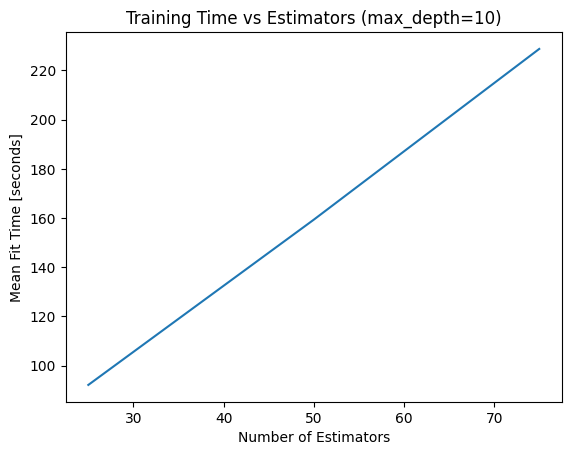

In [25]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(cv_results[mask]["param_randomforestclassifier__n_estimators"],
         cv_results[mask]["mean_fit_time"]
        )
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

We can see that when number of estimators is higher the mean fit time is higher too.

Now we are going to look at max_depth. We are going to analyze the n_estimators equals 25.

We plot "param_randomforestclassifier__max_depth" on the x-axis and "mean_fit_time" on the y-axis. 

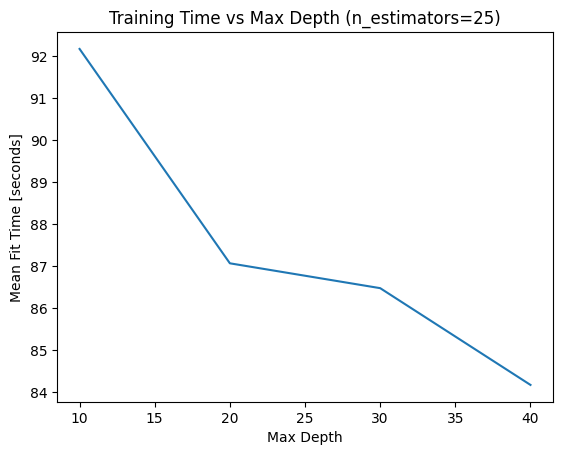

In [26]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"]==25
# Plot fit time vs max_depth
plt.plot(cv_results[mask]["param_randomforestclassifier__max_depth"],
        cv_results[mask]["mean_fit_time"]
        )
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

We can see that when max depth is higher, mean fit time is higher too.

Now we extract the best hyperparameters from model.

In [27]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 75}

In [28]:
model.best_score_

0.9999604310330603

In [29]:
model.best_estimator_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, n_estimators=75,
                                        random_state=42))])

Now we are going to predict with the best model.

In [30]:
model.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1])

## Evaluate

We are going to evaluate the model.

Calculate the training and test accuracy scores for model.

In [31]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9996


We beat the baseline. 

Now using confucion matrix we are going to see how the model performs.

First we count how many observation in y_test belong to positive and negative class.

In [32]:
y_test.value_counts()

Class
0    56864
1       98
Name: count, dtype: int64

Now we plot hte confusion matrix.

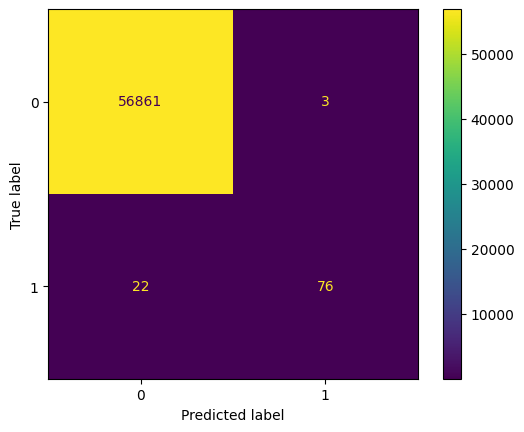

In [33]:

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

This model decrease the number of False Positives.

## Communicate

We obtain the features and importances of our model and plot them.

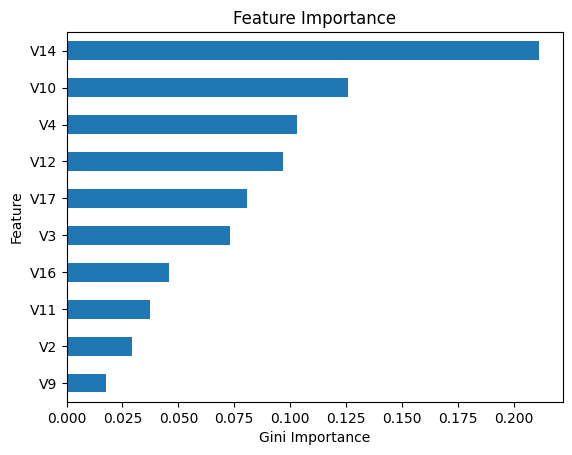

In [34]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps[
    "randomforestclassifier"
].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");